In [416]:
import io
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
%matplotlib inline

1.a. Read Data from the file

In [417]:
filename = "svar-set1.dat.txt"
r = io.open(filename, encoding='utf8').readlines()
X = []
Y = []
for i in r:
    if i.split()[0] != '#':
        tmp = i.split()
        X.append([float(tmp[o]) for o in range(len(tmp)-1)])
        Y.append([float(tmp[-1])])

# 1.a. Plotting the Data

In [418]:
def graph_plot(x,y,x_name,y_name,style):
    plt.plot(x,y,style)
    plt.xlabel(x_name)
    plt.ylabel(y_name)

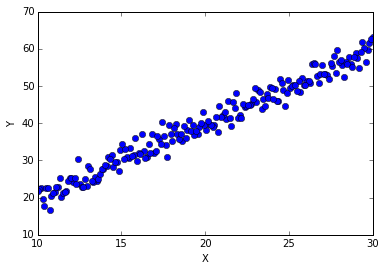

In [419]:
graph_plot(X,Y,"X","Y",'o')

# 1.b. Fit Linear Model

#### Function to Create Data Matrix

In [420]:
def create_data(data):
    z = data
    for j in z:
        j.insert(0,1)   
    return z

#### Function to Create Polynomial Data Martrix of degree n

In [421]:
def create_polynomial(data,degree):
    for i in range(2,degree+1):
        for j in data:
            j.insert(i,j[1]**i)
    return data

#### Function to find theta - Equivalent to fit function in Python

In [422]:
def find_theta(Data,Labels):
    return np.linalg.solve((np.dot(np.array(Data).transpose(),np.array(Data))),
                           (np.dot(np.array(Data).transpose(),np.array(Labels))))

In [423]:
def find_theta_linear(Data,Labels):
    x = []
    y = []
    x = [[len(Data),sum([i[0] for i in Data])],
        [sum([i[0] for i in Data]), sum([i[0]**2 for i in Data])]]
    y = [[sum([i[0] for i in Labels])], [sum([i[0]*j[0] for i,j in zip(Data,Labels)])]]
    return np.linalg.solve(np.array(x),np.array(y))

In [444]:
print "theta", find_theta_linear(X,Y)

theta [[ 0.26120329]
 [ 1.98610257]]


#### Function to Predict unknown - Equivalent to predict function in Python

In [425]:
def predict(t,z):
    predictions = []
    for i in z:
        predictions.append(np.dot(t.transpose(),np.array(i)))
    return predictions

#### Function to find Mean Square Error

In [426]:
def mean_squrae_error(pred,y):
    return sum([(i-j)**2 for i,j in zip(pred,y)])/len(pred)
    

### Function to create n equals folds of index for cross validation

In [427]:
def fold_indices(size, folds):
    block_list = [size//folds for i in range(folds)]
    if size%folds != 0:
        for i in range(n%n_folds):
            block_list[i] += 1
    current = 0
    indices = []
    for x in block_list:
        m,n = current, current + x
        indices.append((m,n))
        current = n
    return indices

### Cross Validation for n folds using manualy created fit and predict functions; Finding the Training Error and Testing Error

In [428]:
def cross_validation(data,labels,folds):
    k_index = fold_indices(len(labels), folds)
    Theta_list = []
    training_MSE_list =[]
    testing_MSE_list = []
    for i in k_index:
        Z_test = data[i[0]:i[1]]
        Y_test = labels[i[0]:i[1]]
        Z_train = []
        Y_train = []
        for j in k_index:
            if i != j:
                Z_train = Z_train + data[j[0]:j[1]]
                Y_train = Y_train + labels[j[0]:j[1]]
        Theta  = find_theta(Z_train,Y_train)
        training_MSE = mean_squrae_error(predict(Theta,Z_train), Y_train)
        pred = predict(Theta,Z_test)
        MSE = mean_squrae_error(pred, Y_test)
        Theta_list.append(Theta)
        testing_MSE_list.append(MSE)
        training_MSE_list.append(training_MSE)
    return Theta_list, testing_MSE_list, training_MSE_list

In [429]:
Z= deepcopy(X)
Z = create_data(Z)

### The Training and Testing Error for Linear Model

In [430]:
thetas,test_mse,training_mse = cross_validation(Z,Y,10)
print("The theta, Training Errot and Testing Error for Linear Model for 10 folds")
print("Theta\t\tTraining Error\tTesting Error")
for i in range(len(training_mse)):
    print "%f\t%f\t%f" %(thetas[i][1],test_mse[i][0],training_mse[i][0])

The theta, Training Errot and Testing Error for Linear Model for 10 folds
Theta		Training Error	Testing Error
1.963818	3.494482	4.335186
1.976376	3.887770	4.277045
1.997490	5.549540	4.091733
1.992833	4.725401	4.180044
1.981711	3.953828	4.267194
1.984229	3.769533	4.288279
2.009146	5.420900	4.120873
1.992156	3.498455	4.323401
1.986986	5.135499	4.137732
1.977350	4.252117	4.233439


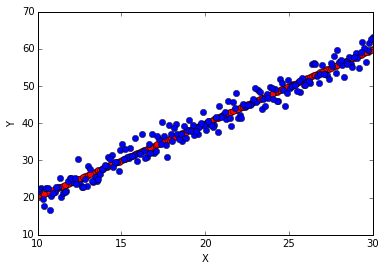

In [431]:
Y_predicted = predict(find_theta(Z,Y),Z)
#graph_plot(X,Y_predicted,"X","Y",'k-')
plt.plot(X,Y_predicted,'ro')
plt.plot(X,Y,'bo')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# 1.C. Compare results by Python Made functions

### Cross Validation for n folds using Python Linear Regression fit and predict functions; Finding the Training Error and Testing Error

In [432]:
def cross_validation_python(data,labels,folds):
    k_index = fold_indices(len(labels), folds)
    x = LinearRegression()
    Theta_list = []
    training_MSE_list =[]
    testing_MSE_list = []
    for i in k_index:
        Z_test = data[i[0]:i[1]]
        Y_test = labels[i[0]:i[1]]
        Z_train = []
        Y_train = []
        for j in k_index:
            if i != j:
                Z_train = Z_train + data[j[0]:j[1]]
                Y_train = Y_train + labels[j[0]:j[1]]
        x.fit(Z_train,Y_train)
        Theta_list.append(x.coef_)
        training_MSE = mean_squrae_error(x.predict(Z_train), Y_train)
        pred = x.predict(Z_test)
        MSE = mean_squrae_error(pred, Y_test)
        testing_MSE_list.append(MSE)
        training_MSE_list.append(training_MSE)
    return Theta_list, testing_MSE_list, training_MSE_list

In [456]:
thetas_py,test_mse_py,training_mse_py = cross_validation_python(Z,Y,10)
print("The theta, Training Errot and Testing Error for Linear Model for 10 folds")
print("Theta\t\tTraining Error\tTesting Error")
for i in range(len(training_mse)):
    print "%f\t%f\t%f" %(thetas_py[i][0][1],training_mse_py[i][0],test_mse_py[i][0])
print "Train Error Mean\tTest Error Mean"
print np.mean(training_mse_py),"\t\t",np.mean(test_mse_py)

The theta, Training Errot and Testing Error for Linear Model for 10 folds
Theta		Training Error	Testing Error
1.963818	4.335186	3.494482
1.976376	4.277045	3.887770
1.997490	4.091733	5.549540
1.992833	4.180044	4.725401
1.981711	4.267194	3.953828
1.984229	4.288279	3.769533
2.009146	4.120873	5.420900
1.992156	4.323401	3.498455
1.986986	4.137732	5.135499
1.977350	4.233439	4.252117
Train Error Mean	Test Error Mean
4.22549268163 		4.36875256474


### Polynomial models on different subset of data

In [434]:
Zpoly = create_polynomial(deepcopy(Z),2)
Zpoly2 = deepcopy(Z[:50])
Zpoly3 = deepcopy(Z[50:100])
Zpoly4 = deepcopy(Z[100:150])
Zpoly5 = deepcopy(Z[150:])
Zpoly2 = create_polynomial(Zpoly2,2)
Zpoly3 = create_polynomial(Zpoly3,3)
Zpoly4 = create_polynomial(Zpoly4,4)
Zpoly5 = create_polynomial(Zpoly5,5)

In [458]:
thetas_Zpoly2,test_mse_Zploy2,training_mse_Zpoly2 = cross_validation(Zpoly2,Y[:50],10)
print("The theta, Training Errot and Testing Error for Polynomial Model with degree 2 for 10 folds")
print("Theta\t\t\tTraining Error\tTesting Error")
for i in range(len(training_mse)):
    print thetas_Zpoly2[i] ,"\t%f\t\t%f" %(training_mse_Zpoly2[i][0],test_mse_Zploy2[i][0])
print "Train Error Mean\tTest Error Mean"
print np.mean(training_mse_Zpoly2),"\t\t",np.mean(test_mse_Zploy2)

The theta, Training Errot and Testing Error for Polynomial Model with degree 2 for 10 folds
Theta			Training Error	Testing Error
[[-3.83210238]
 [ 2.30021353]
 [-0.00596564]] 	3.461511		1.027885
[[-4.21095603]
 [ 2.32325261]
 [-0.00596991]] 	3.455339		0.989537
[[ -2.80025020e+00]
 [  2.17383216e+00]
 [ -2.37632095e-03]] 	3.464418		0.945979
[[-3.61265253]
 [ 2.2623591 ]
 [-0.00506385]] 	2.819259		7.063362
[[ -1.38322996e+00]
 [  2.05798934e+00]
 [ -1.93021657e-04]] 	3.184174		3.907572
[[-4.86613532]
 [ 2.38546695]
 [-0.00747365]] 	2.877953		6.199019
[[-3.79138488]
 [ 2.25000624]
 [-0.00387275]] 	3.270456		2.787358
[[-4.59610704]
 [ 2.35299942]
 [-0.00662151]] 	3.352850		1.907278
[[-5.65818754]
 [ 2.45380228]
 [-0.00848083]] 	2.905729		6.422957
[[-4.14898595]
 [ 2.31350895]
 [-0.0057609 ]] 	3.072809		4.399787
Train Error Mean	Test Error Mean
3.18644963764 		3.56507336941


In [464]:
thetas_Zpoly3,test_mse_Zploy3,training_mse_Zpoly3 = cross_validation(Zpoly3,Y[50:100],10)
print("The theta, Training Errot and Testing Error for Linear Model for 10 folds")
print("Theta\t\t\tTraining Error\tTesting Error")
for i in range(len(training_mse)):
    print thetas_Zpoly3[i] ,"\t%f\t\t%f" %(training_mse_Zpoly3[i][0],test_mse_Zploy3[i][0])
print "Train Error Mean\tTest Error Mean"
print np.mean(training_mse_Zpoly3),"\t\t",np.mean(test_mse_Zploy3)

 The theta, Training Errot and Testing Error for Linear Model for 10 folds
Theta			Training Error	Testing Error
[[  2.47479118e+00]
 [  1.55858343e+00]
 [  2.94559378e-02]
 [ -6.33563059e-04]] 	4.418800		7.653483
[[  5.75156962e+00]
 [  1.13928856e+00]
 [  4.27502743e-02]
 [ -6.95010913e-04]] 	4.509041		6.376062
[[ -1.32611089e+01]
 [  4.71323821e+00]
 [ -1.65710119e-01]
 [  3.09710141e-03]] 	4.027673		12.112275
[[ -3.30333196e+00]
 [  2.84480056e+00]
 [ -5.40025257e-02]
 [  1.00668306e-03]] 	4.967308		2.011624
[[ -5.24204402e-01]
 [  2.27108087e+00]
 [ -1.92971725e-02]
 [  3.70201568e-04]] 	5.090600		0.862397
[[  8.51596696e+00]
 [  7.89718372e-01]
 [  5.57186219e-02]
 [ -8.18844452e-04]] 	4.210692		9.674184
[[ -3.12409090e+00]
 [  2.69644582e+00]
 [ -4.33994651e-02]
 [  8.04444596e-04]] 	4.547748		5.910047
[[ -2.77266805e+00]
 [  2.65712609e+00]
 [ -3.89281400e-02]
 [  6.65137484e-04]] 	4.833522		3.302466
[[ -3.90772342e+00]
 [  2.95542888e+00]
 [ -5.83713207e-02]
 [  1.03400609e-03]

In [465]:
thetas_Zpoly4,test_mse_Zploy4,training_mse_Zpoly4 = cross_validation(Zpoly4,Y[100:150],10)
print("The theta, Training Errot and Testing Error for Linear Model for 10 folds")
print("Theta\t\t\tTraining Error\tTesting Error")
for i in range(len(training_mse)):
    print thetas_Zpoly4[i] ,"\t%f\t\t%f" %(training_mse_Zpoly4[i][0],test_mse_Zploy4[i][0])
print "Train Error Mean\tTest Error Mean"
print np.mean(training_mse_Zpoly4),"\t\t",np.mean(test_mse_Zploy4)

The theta, Training Errot and Testing Error for Linear Model for 10 folds
Theta			Training Error	Testing Error
[[  7.89571345e+00]
 [  4.40277217e-01]
 [  1.32850405e-01]
 [ -5.11349948e-03]
 [  6.97052103e-05]] 	3.810678		6.657468
[[  2.57165728e+01]
 [ -3.59670655e+00]
 [  4.62918652e-01]
 [ -1.67363362e-02]
 [  2.18808573e-04]] 	4.232794		1.935351
[[  4.34514612e+01]
 [ -6.93764670e+00]
 [  6.72500751e-01]
 [ -2.20147737e-02]
 [  2.64008818e-04]] 	3.776859		7.020499
[[  2.25869700e+01]
 [ -2.80581108e+00]
 [  3.95284755e-01]
 [ -1.43668820e-02]
 [  1.89982828e-04]] 	4.129259		2.756099
[[  2.91839042e+01]
 [ -4.55694150e+00]
 [  5.52580805e-01]
 [ -2.00825834e-02]
 [  2.62690700e-04]] 	3.702394		6.952521
[[  3.10063324e+01]
 [ -5.21707897e+00]
 [  6.27783916e-01]
 [ -2.34432627e-02]
 [  3.13279052e-04]] 	4.064476		3.530350
[[  3.31240860e+01]
 [ -4.95471691e+00]
 [  5.46913260e-01]
 [ -1.88271234e-02]
 [  2.36593026e-04]] 	4.145387		2.613941
[[  5.75786083e+01]
 [ -1.08063838e+01]
 [

In [466]:
thetas_Zpoly5,test_mse_Zploy5,training_mse_Zpoly5 = cross_validation(Zpoly5,Y[150:],10)
print("The theta, Training Errot and Testing Error for Linear Model for 10 folds")
print("Theta\t\t\tTraining Error\tTesting Error")
for i in range(len(training_mse)):
    print thetas_Zpoly5[i] ,"\t%f\t\t%f" %(training_mse_Zpoly5[i][0],test_mse_Zploy5[i][0])
print "Train Error Mean\tTest Error Mean"
print np.mean(training_mse_Zpoly5),"\t\t",np.mean(test_mse_Zploy5)

The theta, Training Errot and Testing Error for Linear Model for 10 folds
Theta			Training Error	Testing Error
[[ -2.92002518e+01]
 [  6.61703965e+00]
 [ -2.51735859e-01]
 [  8.11155815e-03]
 [ -2.59124949e-04]
 [  4.63466855e-06]] 	3.668099		6.196769
[[  6.50859617e+01]
 [ -2.05175340e+01]
 [  2.75982273e+00]
 [ -1.53834360e-01]
 [  3.98340811e-03]
 [ -3.88819819e-05]] 	3.847823		2.776385
[[ -2.39663199e+01]
 [  6.00050720e+00]
 [ -2.77013128e-01]
 [  1.37282642e-02]
 [ -4.84637705e-04]
 [  7.29971448e-06]] 	3.781692		3.331360
[[  6.19995624e+01]
 [ -1.95271289e+01]
 [  2.63351505e+00]
 [ -1.46372404e-01]
 [  3.77601208e-03]
 [ -3.66590817e-05]] 	3.751500		3.907112
[[ -1.34246365e+02]
 [  3.73912072e+01]
 [ -3.67856297e+00]
 [  1.89477871e-01]
 [ -4.83849963e-03]
 [  4.89235195e-05]] 	3.341711		8.019959
[[ -5.54151803e+01]
 [  1.32455906e+01]
 [ -8.58075980e-01]
 [  3.21970607e-02]
 [ -6.35018998e-04]
 [  5.64698754e-06]] 	3.620137		5.079889
[[  1.35562500e+02]
 [ -4.09296896e+01]
 [ 

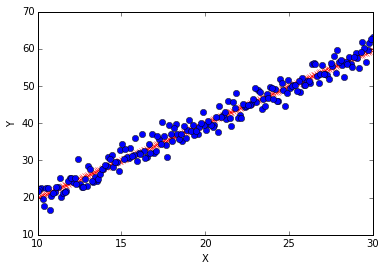

In [446]:
Y_predicted_poly2 = predict(find_theta(Zpoly,Y),Zpoly)
plt.plot(X,Y_predicted_poly2,'rx')
plt.plot(X,Y,'bo')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

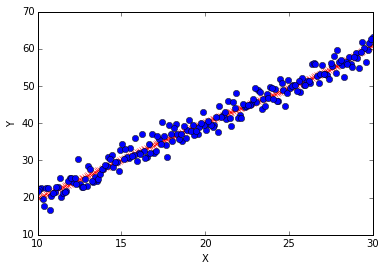

In [447]:
Zpoly_4 = create_polynomial(deepcopy(Z),4)
Y_predicted_poly4 = predict(find_theta(Zpoly_4,Y),Zpoly_4)
plt.plot(X,Y_predicted_poly4,'rx')
plt.plot(X,Y,'bo')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# 1.d Reduce the size of data and evaluate performance

In [491]:
test_size = int(0.1 *len(X))
test_idx = len(Z) -test_size
Z_new_test = Z[test_idx:]
Y_new_test = Y[test_idx:]
train_size = [90,75,50,25]
Z_train_new = {}
Y_train_new = {}
for i in train_size:
    train_idx = int((i*1.0/100)*len(Z))
    Z_train_new[i] = Z[0:train_idx]
    Y_train_new[i] = Y[0:train_idx]
    

In [492]:
def analysis(train,knownl,test,unknownl):
    predict_reduced = {}
    MSE_reduced ={}
    for i in train:
        predict_reduced[i] = predict(find_theta(train[i],knownl[i]),test)
        MSE_reduced[i] = mean_squrae_error(predict_reduced[i],unknownl)
    return predict_reduced,MSE_reduced

In [493]:
new_predict,new_MSE = analysis(Z_train_new,Y_train_new,Z_new_test,Y_new_test)

In [497]:
print "Mean error when the training data is some percentage of original data "
print "Percentage\tMean_Error"
for i in new_MSE:
    print i,"\t\t",np.mean(new_MSE[i])

Mean error when the training data is some percentage of original data 
Percentage	Mean_Error
25 		4.11851132164
90 		4.25211689881
75 		4.26609161477
50 		4.0877489189
